## Loading Libraries and Data

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/Calidad_del_Aire_Municipio_de_Duitama_20240627.csv')

# Exploratory Data Analysis of Duiatama Air Quality 2023

## Replacement of Values of 0 in 'Relative Humidity' and 'Temperature' by NaN

In air quality data, it is common to find values that are invalid or represent missing data. In this data set, it has been decided to replace the values of 0 in the **'Relative Humidity'** and **'Temperature'** columns with `NaN`, since 0 may not be a realistic value for these measurements. This procedure facilitates the identification of missing data and their subsequent processing.

In [46]:
# Replace values of 0 in 'Humedad Relativa' and 'Temperatura' by NaN
df['Humedad Relativa'] = df['Humedad Relativa'].replace(0, pd.NA)
df['Temperatura'] = df['Temperatura'].replace(0, pd.NA)

# Verify data about NaN values
filter_nan = df['Humedad Relativa'].isna() & df['Temperatura'].isna()
data_nan = df[filter_nan]
print('Registros con Humedad Relativa y Temperatura NAN',len(data_nan))
print(df[['Humedad Relativa', 'Temperatura']].isna().sum())

# Proportion of records with 'Humedad Relativa' and 'Temperatura' equal to NaN with respect to the total.
proporcion_igual_cero = (len(data_nan)/ len(df)) * 100
print(f"Proporción de registros con Humedad Relativa y Temperatura NAN: {proporcion_igual_cero:.2f}%")

Registros con Humedad Relativa y Temperatura NAN 4138
Humedad Relativa    4138
Temperatura         4139
dtype: int64
Proporción de registros con Humedad Relativa y Temperatura NAN: 13.62%


## Data Cleansing

After replacing the values of 0 in the `Humedad Relativa` and `Temperatura` columns, we proceed to clean the DataFrame to remove any records that still have `NaN` values in `Temperatura`.

In [47]:
df_clean_ht = df[~filter_nan]
df_clean = df_clean_ht.dropna(subset=['Temperatura'])

# Verify data info and structure
print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 26243 entries, 1 to 30381
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             26243 non-null  object 
 1   Nombre Equipo     26243 non-null  object 
 2   co                26243 non-null  float64
 3   co2               26243 non-null  float64
 4   pm10              26243 non-null  float64
 5   pm2_5             26243 non-null  float64
 6   pm5               26243 non-null  float64
 7   Humedad Relativa  26243 non-null  object 
 8   Temperatura       26243 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.0+ MB
None
                 co           co2          pm10         pm2_5           pm5
count  26243.000000  26243.000000  26243.000000  26243.000000  26243.000000
mean      16.366346    427.574405     17.556342     16.300665     10.019014
std        9.127754    154.399167     31.192257     42.331056     33.552587
min        0.000000

## Contaminant Distribution

To understand the distribution of the different pollutants recorded by the sensors, histograms were generated for each of them. This helps to visualize the frequency and distribution of the values of each pollutant in the data.

<Figure size 1400x800 with 0 Axes>

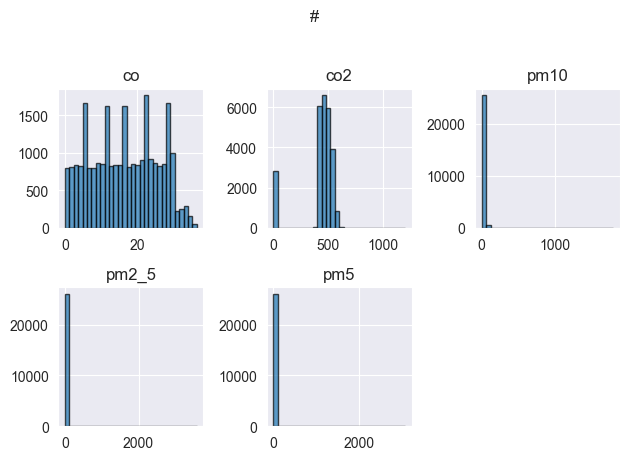

In [48]:
# Contaminants Histograms
plt.figure(figsize=(14, 8))
df_clean[['co', 'co2', 'pm10', 'pm2_5', 'pm5']].hist(bins=30, edgecolor='black', alpha=0.7, layout=(2, 3))
plt.suptitle('#')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Data Preparation

The date column is converted to datetime format and we create a new column representing each month.

In [49]:
df_clean = df.copy()
df_clean['Fecha'] = pd.to_datetime(df_clean['Fecha'], format='%d/%m/%Y %I:%M:%S %p', errors='coerce')
df_clean.dropna(subset=['Fecha'], inplace=True)
df_clean['Mes'] = df_clean['Fecha'].dt.to_period('M').dt.to_timestamp()

## Contaminant Trend Over Time by Month

To analyze the time trends of the pollutants, the monthly average of the concentrations recorded by each measurement equipment was calculated. This allows us to observe how the concentrations of each pollutant vary over time and between different measurement points.

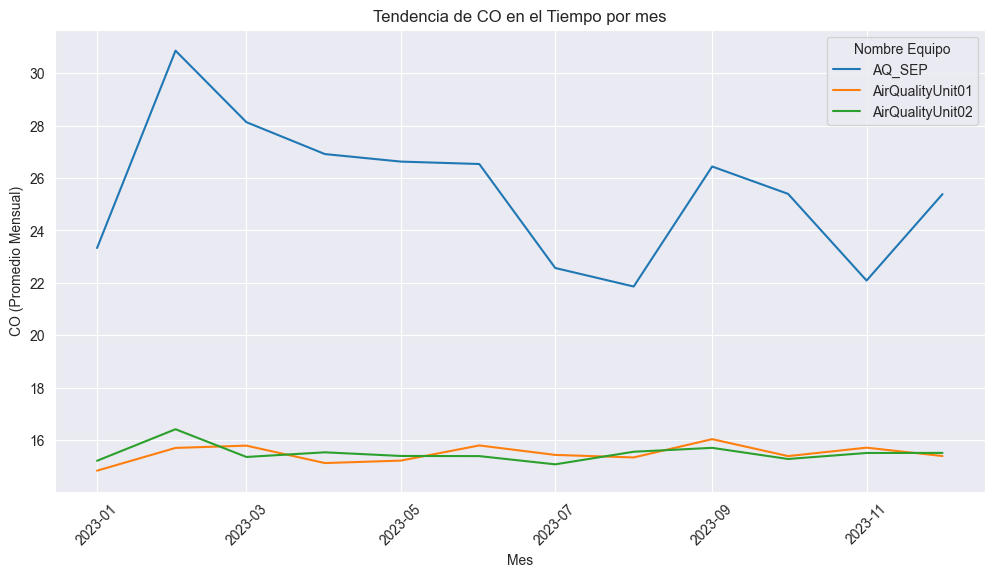

In [50]:
df_group_co = df_clean.groupby(['Mes', 'Nombre Equipo'])['co'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_group_co, x='Mes', y='co', hue='Nombre Equipo')
plt.title('Tendencia de CO en el Tiempo por mes')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('CO (Promedio Mensual)')
plt.show()

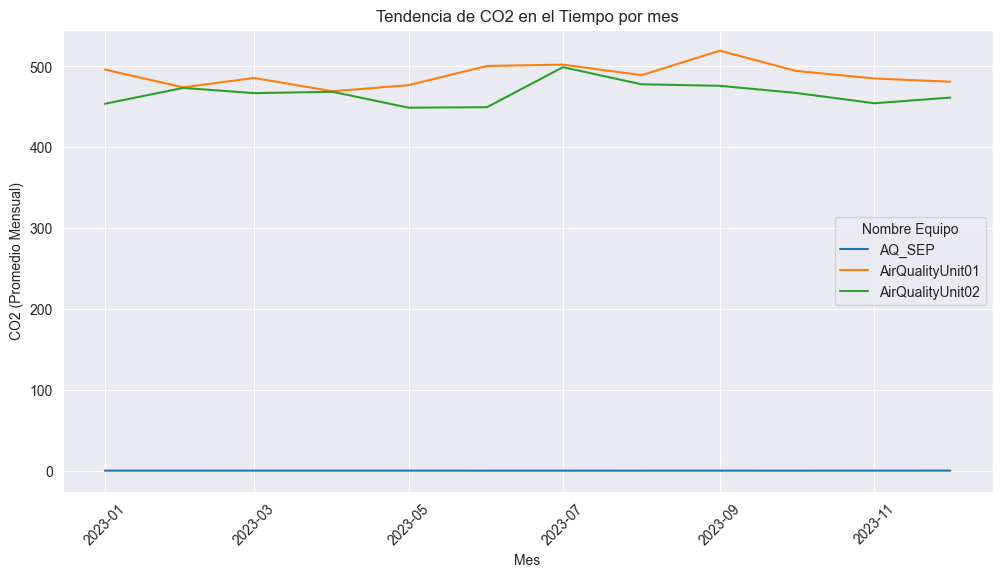

In [51]:
df_group_co2 = df_clean.groupby(['Mes', 'Nombre Equipo'])['co2'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_group_co2, x='Mes', y='co2', hue='Nombre Equipo')
plt.title('Tendencia de CO2 en el Tiempo por mes')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('CO2 (Promedio Mensual)')
plt.show()

## Análisis de Tendencias Temporales de PM2.5 por Mes

En esta sección, se analiza la tendencia de PM2.5 agrupada por mes para cada dispositivo de medición. Esto permite observar patrones mensuales en las concentraciones de PM2.5 y evaluar cómo varían a lo largo del tiempo.


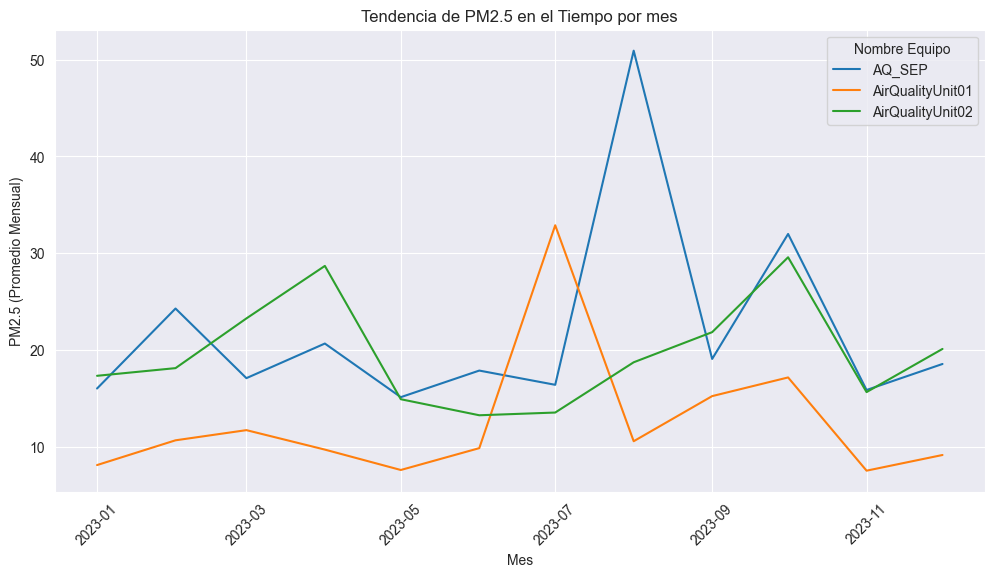

In [52]:
# Tendencias temporales de PM2.5
df_group_pm2_5 = df_clean.groupby(['Mes', 'Nombre Equipo'])['pm2_5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_group_pm2_5, x='Mes', y='pm2_5', hue='Nombre Equipo')
plt.title('Tendencia de PM2.5 en el Tiempo por mes')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('PM2.5 (Promedio Mensual)')
plt.show()

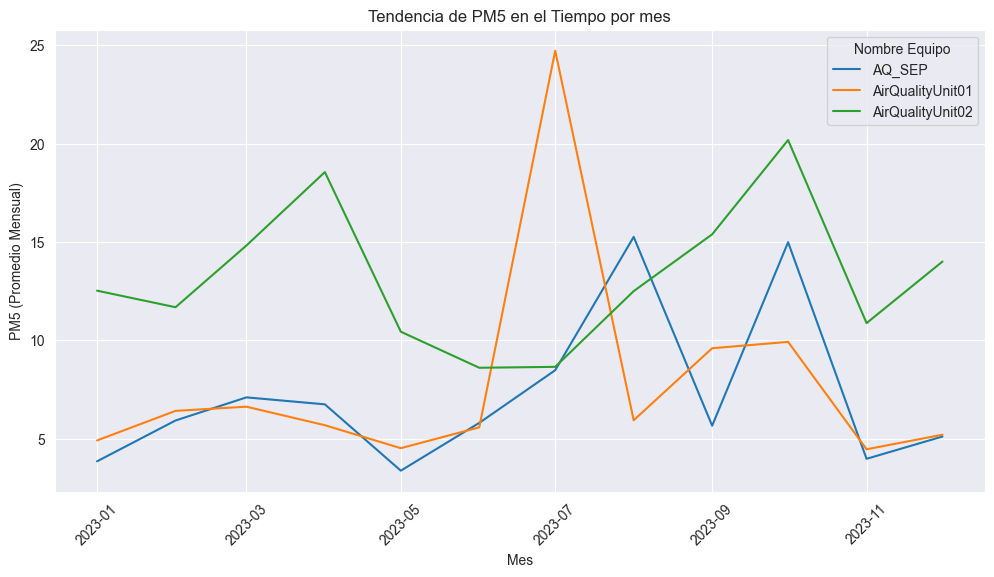

In [53]:
df_group_pm5 = df_clean.groupby(['Mes', 'Nombre Equipo'])['pm5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_group_pm5, x='Mes', y='pm5', hue='Nombre Equipo')
plt.title('Tendencia de PM5 en el Tiempo por mes')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('PM5 (Promedio Mensual)')
plt.show()

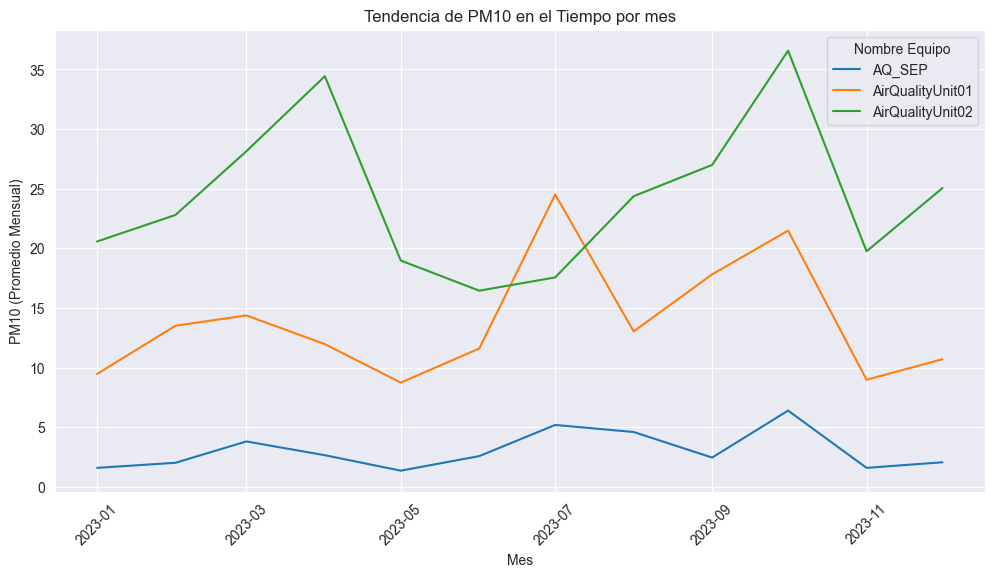

In [54]:
df_group_pm10 = df_clean.groupby(['Mes', 'Nombre Equipo'])['pm10'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_group_pm10, x='Mes', y='pm10', hue='Nombre Equipo')
plt.title('Tendencia de PM10 en el Tiempo por mes')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('PM10 (Promedio Mensual)')
plt.show()

## Correlation Heat Map

To better understand the relationships between the different air quality variables, the correlation matrix was calculated and visualized using a heat map. This tool is useful to identify which variables are highly correlated and how they interact with each other.

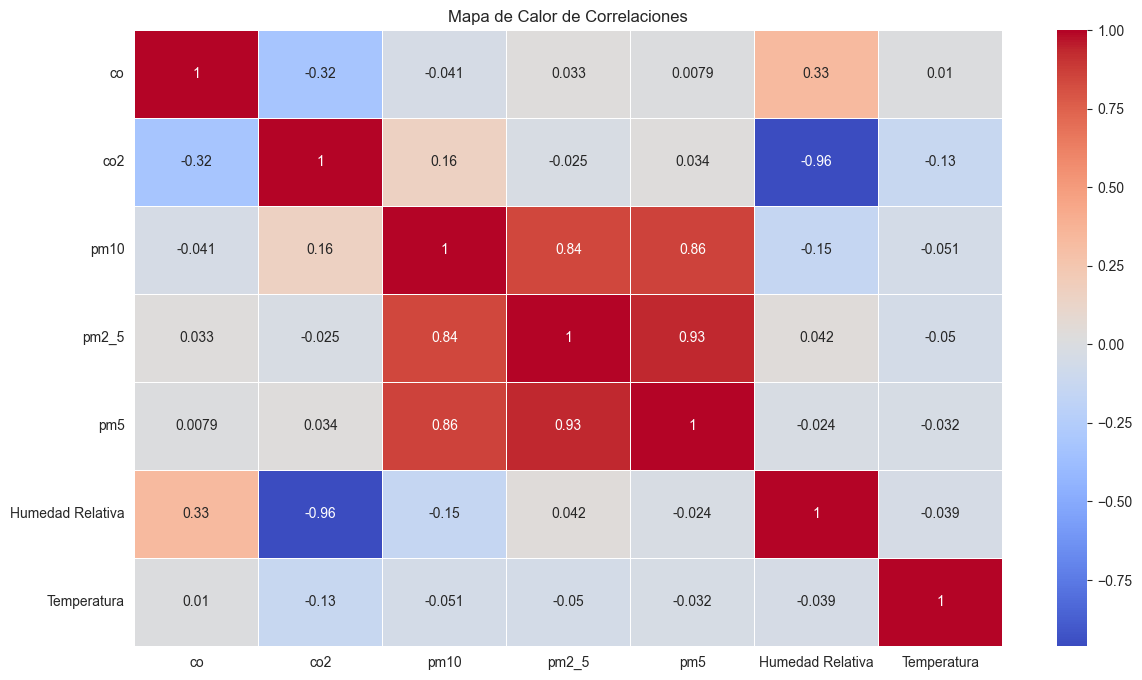

In [56]:
numeric_columns = ['co', 'co2', 'pm10', 'pm2_5', 'pm5', 'Humedad Relativa', 'Temperatura']
df_clean[numeric_columns] = df_clean[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_clean = df_clean.dropna(subset=numeric_columns)

plt.figure(figsize=(14, 8))
correlation_matrix = df_clean[['co', 'co2', 'pm10', 'pm2_5', 'pm5', 'Humedad Relativa', 'Temperatura']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()